In [1]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time

import tushare as ts
import time
import sys

import warnings
warnings.simplefilter("ignore")
import os
#os.chdir(r'E:\SR\REITs')

% matplotlib inline

please install talib


In [229]:
CategoryDict = {'CNYA':'China Index',
           'CAF':'Mix',
           'ASHS':'China Index',
           'ASHR':'China Index',
           'CN':'Mix',
           #'FXI':'CN Stocks in HK',
           'CHIQ':'China Sector',
           'CHIS':'China Sector',
           'CHIX':'China Sector',
           'CHIK':'China Sector',
           'CHII':'China Sector',
           'PEK':'China Index',
           #'CHAD':'Short China A share',
           'CQQQ':'HN',
           'CHIC':'China Sector',
           'KWEB':'HN',
           
           # regular stocks
           'JD':'Stock',
           'BABA':'Stock',
           'TCEHY':'Stock',
           
                    '^GSPC':'SP500'}

In [172]:
import copy

EtfDict = {'CNYA':'MSCI China A ETF',
           'CAF':'摩根史坦利 80% A股',
           'ASHS':'德银 A share 500 小盘',
           'ASHR':'德银 A share 300',
           'CN':'Xtracers ALL CN stocks, through german bank"s ETF',
           #'FXI':'CN Stocks in HK',
           'CHIQ':'CN Consumer 生活消费股',
           'CHIS':'CN Consumer 生活消费股',
           'CHIX':'CN Financials',
           'CHIK':'CN IT',
           'CHII':'CN Industry',
           'CHIC':'China 互联网电信',
           'PEK':'ChinaAMC',
           #'CHAD':'Short China A share',
           'CQQQ':'China 互联网， ABHN股',
           
           'KWEB':'China 互联网， HN股',
           
           # regular stocks
           'JD':'京东',
           'BABA':'阿里巴巴',
           'TCEHY':'腾讯',
           
                    '^GSPC':'SP500'}




dict_of_Series = {}
dfList = []

startDate = '2017-01-01'
endDate = '2019-09-10'


for reit in list(EtfDict.keys()):
    SeriesName = str(reit) 
    
    df = yf.download(reit, startDate, endDate)
    df['Symbol'] = SeriesName
    dfList.append(df)
    
    SeriesValue = df['Adj Close']
    dict_of_Series[SeriesName] = copy.deepcopy(SeriesValue)
    
Rst = pd.DataFrame(dict_of_Series)
Rst.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,CHIX,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,^GSPC
Date,,,,,,,,,,,,,,,,,,
2017-01-03,23.39,32.70,88.60,15.09,NaN,11.33,NaN,10.95,NaN,12.02,25.67,23.83,35.00,25.82,33.80,34.08,24.27,2257.83
2017-01-04,23.96,33.64,90.51,15.18,NaN,11.53,NaN,11.04,NaN,12.10,26.14,23.83,35.90,25.85,34.34,34.82,24.37,2270.75
2017-01-05,24.15,34.02,94.37,15.34,NaN,11.69,NaN,11.21,NaN,12.29,26.52,24.61,36.80,26.30,35.50,35.23,24.90,2269.00
2017-01-06,23.75,33.42,93.89,15.07,NaN,11.69,NaN,11.07,NaN,12.19,26.35,24.36,36.57,26.27,35.36,34.66,25.02,2276.98
2017-01-09,23.78,33.57,94.72,15.08,NaN,11.57,NaN,11.15,NaN,12.21,26.38,24.35,37.17,26.26,35.58,34.66,25.10,2268.90


In [173]:
Rst.reset_index(inplace=True, drop=False)

In [174]:
Rst.isnull().sum() / len(Rst)

Date     0.000000
ASHR     0.000000
ASHS     0.000000
BABA     0.000000
CAF      0.000000
CHIC     0.366864
CHII     0.000000
CHIK     0.721893
CHIQ     0.000000
CHIS     0.721893
CHIX     0.000000
CN       0.000000
CNYA     0.000000
CQQQ     0.000000
JD       0.000000
KWEB     0.000000
PEK      0.000000
TCEHY    0.000000
^GSPC    0.000000
dtype: float64

In [175]:
Rst2 = Rst[Rst['Date']>'2017-01-01']
Rst2.isnull().sum() / len(Rst2)

Date     0.000000
ASHR     0.000000
ASHS     0.000000
BABA     0.000000
CAF      0.000000
CHIC     0.366864
CHII     0.000000
CHIK     0.721893
CHIQ     0.000000
CHIS     0.721893
CHIX     0.000000
CN       0.000000
CNYA     0.000000
CQQQ     0.000000
JD       0.000000
KWEB     0.000000
PEK      0.000000
TCEHY    0.000000
^GSPC    0.000000
dtype: float64

In [176]:
Rst2.head()

,Date,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,CHIX,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,^GSPC
0,2017-01-03,23.39,32.70,88.60,15.09,NaN,11.33,NaN,10.95,NaN,12.02,25.67,23.83,35.00,25.82,33.80,34.08,24.27,2257.83
1,2017-01-04,23.96,33.64,90.51,15.18,NaN,11.53,NaN,11.04,NaN,12.10,26.14,23.83,35.90,25.85,34.34,34.82,24.37,2270.75
2,2017-01-05,24.15,34.02,94.37,15.34,NaN,11.69,NaN,11.21,NaN,12.29,26.52,24.61,36.80,26.30,35.50,35.23,24.90,2269.00
3,2017-01-06,23.75,33.42,93.89,15.07,NaN,11.69,NaN,11.07,NaN,12.19,26.35,24.36,36.57,26.27,35.36,34.66,25.02,2276.98
4,2017-01-09,23.78,33.57,94.72,15.08,NaN,11.57,NaN,11.15,NaN,12.21,26.38,24.35,37.17,26.26,35.58,34.66,25.10,2268.90


# Investigate Change Correlations to US or CN

In [177]:
for i in range(len(dfList)):
    print(len(dfList[i]))


676
676
676
676
676
188
676
676
676
676
676
676
188
428
676
676
676
676


In [178]:
ChangeDict = {}

for i in range(len(dfList)):
    df = dfList[i]
    if len(df) > 0:
        df['AdjClose_Pre'] = np.NaN
        df['AdjClose_Pre'][1:len(df)] = df['Adj Close'][0:(len(df)-1)]
        df['ChangPct'] = (df['Adj Close'] - df['AdjClose_Pre']) / df['AdjClose_Pre'] * 100
        Symbol = df['Symbol'][0]
        SeriesValue = df['ChangPct']
        ChangeDict[Symbol] = copy.deepcopy(SeriesValue)

In [179]:
ChangeDf = pd.DataFrame(ChangeDict)
ChangeDf.reset_index(inplace=True, drop=False)
ChangeDf = ChangeDf[ChangeDf['Date']>='2017-01-01']
ChangeDf.head()

,Date,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,CHIX,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,^GSPC
0,2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,2.436939,2.874618,2.155756,0.596421,NaN,1.765225,NaN,0.821918,NaN,0.665557,1.830931,0.000000,2.571429,0.116189,1.597633,2.171362,0.412031,0.572231
2,2017-01-05,0.792988,1.129608,4.264722,1.054018,NaN,1.387684,NaN,1.539855,NaN,1.570248,1.453711,3.273185,2.506964,1.740812,3.377985,1.177484,2.174805,-0.077067
3,2017-01-06,-1.656315,-1.763668,-0.508636,-1.760104,NaN,0.000000,NaN,-1.248885,NaN,-0.813670,-0.641026,-1.015847,-0.625000,-0.114068,-0.394366,-1.617939,0.481928,0.351697
4,2017-01-09,0.126316,0.448833,0.884013,0.066357,NaN,-1.026518,NaN,0.722674,NaN,0.164069,0.113852,-0.041051,1.640689,-0.038066,0.622172,0.000000,0.319744,-0.354856


In [214]:
## Get sh

startDate = '2006-01-01'
endDate = '2019-09-10'

hs = ts.get_hist_data('sh', start=startDate, end = endDate)
hs = hs.sort_index()
hs.reset_index(inplace=True, drop=False)
hs['date'] = pd.to_datetime(hs['date'])
hs = hs.rename(columns = {'close':'SSEC', 'date':'Date'})
hs.head()

,Date,open,high,SSEC,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2017-03-21,3250.25,3262.22,3261.61,3246.70,1627193.00,10.80,0.33,3261.610,3261.610,3261.610,1627193.00,1627193.00,1627193.00
1,2017-03-22,3246.22,3255.78,3245.22,3229.13,1897316.50,-16.39,-0.50,3253.415,3253.415,3253.415,1762254.75,1762254.75,1762254.75
2,2017-03-23,3245.81,3262.09,3248.55,3221.93,1930291.50,3.33,0.10,3251.793,3251.793,3251.793,1818267.00,1818267.00,1818267.00
3,2017-03-24,3247.35,3275.21,3269.45,3241.12,2197779.25,20.90,0.64,3256.208,3256.208,3256.208,1913145.06,1913145.06,1913145.06
4,2017-03-27,3268.92,3283.24,3266.96,3262.12,2018526.75,-2.49,-0.08,3258.358,3258.358,3258.358,1934221.40,1934221.40,1934221.40


In [215]:
Merged = pd.merge(ChangeDf, hs[['Date', 'p_change']], on ='Date', how = 'inner')
Merged = Merged.rename(columns = {'^GSPC':'SP500','p_change':'SSEC'})
Merged.head()

,Date,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,CHIX,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,SP500,SSEC
0,2017-03-21,0.285481,-0.292056,-2.013986,0.373599,NaN,0.000000,NaN,-1.462664,NaN,-0.873362,0.000000,0.198965,-2.423806,-4.413619,-3.157639,0.028114,-1.499148,-1.240799,0.33
1,2017-03-22,0.406669,0.702988,0.951565,0.992556,NaN,-0.873362,NaN,0.156250,NaN,0.734214,0.245873,0.397141,0.270536,0.857520,0.877853,0.337268,-0.795572,0.188992,-0.50
2,2017-03-23,0.000000,-0.087260,2.036007,1.412776,NaN,1.027900,NaN,0.624025,NaN,0.437318,0.000000,-0.079114,1.349031,2.321779,0.671308,-0.084034,-0.069735,-0.106027,0.10
3,2017-03-24,0.729040,0.436681,-0.193995,0.121139,NaN,-0.436047,NaN,0.930233,NaN,-0.798258,0.525578,0.000000,0.943853,-0.095877,0.666831,0.981217,0.523378,-0.084400,0.64
4,2017-03-27,-0.040209,-0.028986,0.037023,-0.120992,NaN,-1.240876,NaN,-0.921659,NaN,-0.365764,0.000000,0.870942,-0.647327,0.383877,0.000000,0.000000,0.173551,-0.101963,-0.08


In [216]:
Merged['SP500_Pre'] = np.NaN
Merged['SP500_Pre'][1:len(Merged)] = Merged['SP500'][0:(len(Merged)-1)]

In [217]:
len(Merged)

588

In [348]:
Merged.corr().reset_index().rename(columns = {'index':'ETFs'})

,ETFs,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,...,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,SP500,SSEC,SP500_Pre
0,ASHR,1.000000,0.848228,0.553936,0.772522,0.715504,0.399407,0.711434,0.759482,0.665527,...,0.898861,0.947001,0.726203,0.475401,0.670255,0.979681,0.622673,0.494383,0.715574,-0.066609
1,ASHS,0.848228,1.000000,0.451151,0.673940,0.633438,0.380130,0.689984,0.662034,0.546337,...,0.773974,0.822887,0.641091,0.398579,0.571135,0.842088,0.514516,0.383314,0.705891,-0.028109
2,BABA,0.553936,0.451151,1.000000,0.522103,0.709433,0.261044,0.536044,0.731911,0.477572,...,0.708839,0.513039,0.793253,0.644260,0.805778,0.536868,0.635234,0.603609,0.273995,-0.057073
3,CAF,0.772522,0.673940,0.522103,1.000000,0.645587,0.346459,0.641970,0.656845,0.598307,...,0.750039,0.733215,0.650942,0.418156,0.612027,0.759616,0.538929,0.486842,0.568885,0.036535
4,CHIC,0.715504,0.633438,0.709433,0.645587,1.000000,0.359728,0.571693,0.787796,0.456018,...,0.804884,0.682219,0.857675,0.608285,0.851444,0.703211,0.752870,0.595150,0.442467,-0.049964
5,CHII,0.399407,0.380130,0.261044,0.346459,0.359728,1.000000,0.522511,0.426162,0.480704,...,0.452789,0.403193,0.399668,0.226779,0.341695,0.410321,0.343427,0.261751,0.314654,0.115149
6,CHIK,0.711434,0.689984,0.536044,0.641970,0.571693,0.522511,1.000000,0.709873,0.630604,...,0.749094,0.706149,0.760440,0.470379,0.674257,0.719961,0.598040,0.432646,0.521500,0.079425
7,CHIQ,0.759482,0.662034,0.731911,0.656845,0.787796,0.426162,0.709873,1.000000,0.650910,...,0.882872,0.731124,0.886307,0.663815,0.863939,0.749985,0.757491,0.644740,0.474882,-0.047645
8,CHIS,0.665527,0.546337,0.477572,0.598307,0.456018,0.480704,0.630604,0.650910,1.000000,...,0.672141,0.664811,0.587972,0.403918,0.577562,0.676646,0.508252,0.398179,0.419401,0.000710
9,CHIX,0.831991,0.677736,0.606874,0.700159,0.739032,0.428239,0.703279,0.805261,0.596925,...,0.895880,0.796979,0.777225,0.531529,0.738008,0.823381,0.704590,0.600485,0.545321,-0.041976


In [230]:
xx = Merged.corr().reset_index().rename(columns = {'index':'ETFs'})[['ETFs','SP500', 'SSEC']]

In [231]:
xx['ETF_Comp'] = xx['ETFs'].map(CategoryDict)
xx['ETF_Comp'] = xx['ETF_Comp'].fillna('Indexs')
xx

,ETFs,SP500,SSEC,ETF_Comp
0,ASHR,0.494383,0.715574,China Index
1,ASHS,0.383314,0.705891,China Index
2,BABA,0.603609,0.273995,Stock
3,CAF,0.486842,0.568885,Mix
4,CHIC,0.595150,0.442467,China Sector
5,CHII,0.261751,0.314654,China Sector
6,CHIK,0.432646,0.521500,China Sector
7,CHIQ,0.644740,0.474882,China Sector
8,CHIS,0.398179,0.419401,China Sector
9,CHIX,0.600485,0.545321,China Sector


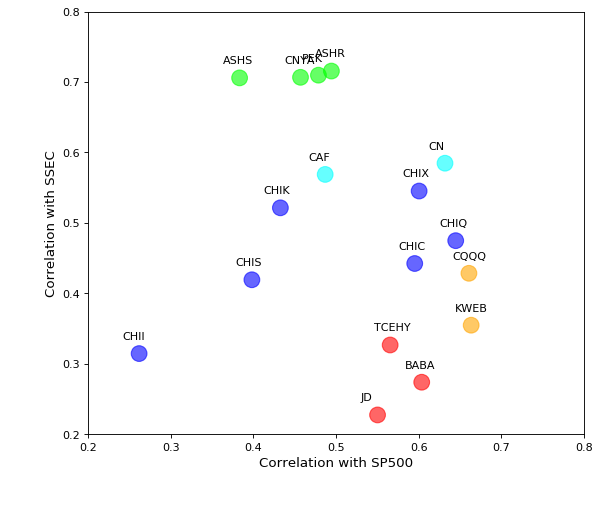

In [259]:
import numpy as np
N = len(xx)
x = xx['SP500']
y = xx['SSEC']
colors = xx['ETF_Comp'].map({'Indexs':'yellow','Stock':'red','China Index':'lime','Mix':'cyan'
                             ,'HN':'orange'
                            ,'China Sector':'blue'})

#z = DoctorsAgg['RealizedRevenue']

#colors = np.random.rand(N)

plt.figure(facecolor='white',figsize=(8,7),dpi=80)
#plt.figure(figsize=(8,6),dpi=80)
plt.scatter(x, y, s=200, c=colors, alpha=0.6)

for i, txt in enumerate(xx['ETFs']):
    plt.annotate(txt, (x[i]-0.02, y[i]+0.02))
plt.xlim(0.2,0.8)
plt.ylim(0.2,0.8)
plt.xlabel('Correlation with SP500', fontsize = 12)
plt.ylabel('Correlation with SSEC', fontsize = 12)
plt.show()

### Adj Close

In [223]:
AdjClose = pd.merge(Rst2, hs[['Date', 'SSEC']], on = 'Date', how = 'inner')
AdjClose = AdjClose.rename(columns = {'^GSPC':'SP500'})
AdjClose.head()

,Date,ASHR,ASHS,BABA,CAF,CHIC,CHII,CHIK,CHIQ,CHIS,CHIX,CN,CNYA,CQQQ,JD,KWEB,PEK,TCEHY,SP500,SSEC
0,2017-03-21,24.59,34.14,105.09,16.12,NaN,13.74,NaN,12.80,NaN,13.62,28.47,25.18,40.66,30.32,39.87,35.58,28.91,2344.02,3261.61
1,2017-03-22,24.69,34.38,106.09,16.28,NaN,13.62,NaN,12.82,NaN,13.72,28.54,25.28,40.77,30.58,40.22,35.70,28.68,2348.45,3245.22
2,2017-03-23,24.69,34.35,108.25,16.51,NaN,13.76,NaN,12.90,NaN,13.78,28.54,25.26,41.32,31.29,40.49,35.67,28.66,2345.96,3248.55
3,2017-03-24,24.87,34.50,108.04,16.53,NaN,13.70,NaN,13.02,NaN,13.67,28.69,25.26,41.71,31.26,40.76,36.02,28.81,2343.98,3269.45
4,2017-03-27,24.86,34.49,108.08,16.51,NaN,13.53,NaN,12.90,NaN,13.62,28.69,25.48,41.44,31.38,40.76,36.02,28.86,2341.59,3266.96


In [224]:
def drawUsCnStocks(Merged, ticker):
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['SP500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('SP 500 & SSEC', fontsize = 12)
    plt.legend(loc = 'upper left')
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()

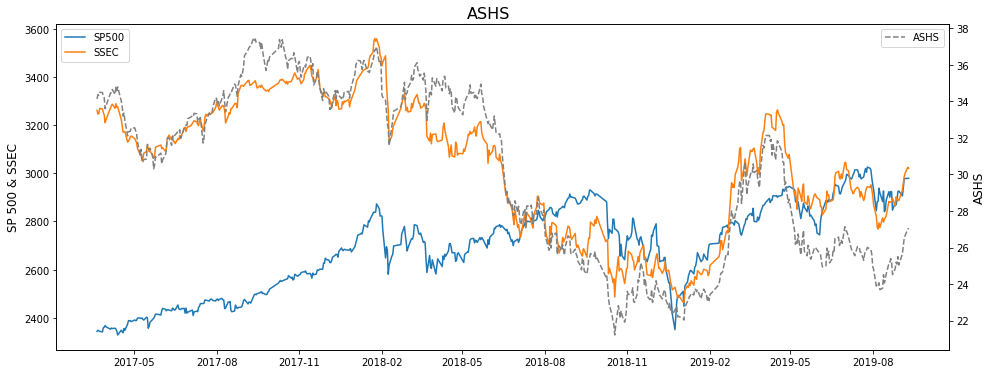

In [225]:
ticker = 'ASHS'
drawUsCnStocks(AdjClose, ticker)

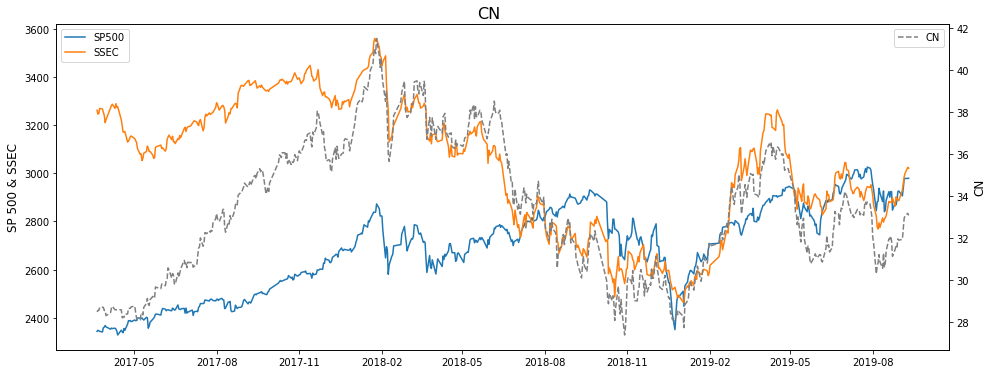

In [226]:
ticker = 'CN'
drawUsCnStocks(AdjClose, ticker)

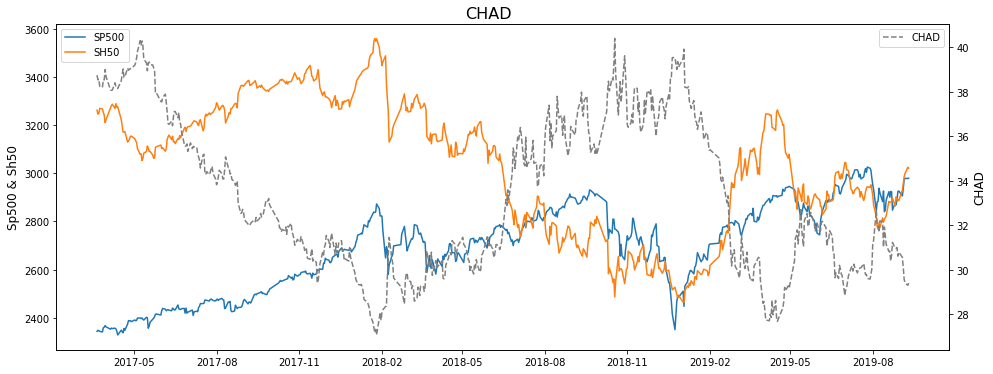

In [94]:
ticker = 'CHAD'
drawUsCnStocks(AdjClose, ticker)

# Plot relative Performance

In [252]:
def drawUsCnStockRelativePerformance(Merged, ticker, startDate):
    Merged = Merged[Merged['Date']>=startDate]
    Merged.reset_index(drop=True, inplace=True)
    Merged[AdjClose.columns[~AdjClose.columns.isin(['Date'])]] = (Merged[AdjClose.columns[~AdjClose.columns.isin(['Date'])]] / 
                                                                  Merged[AdjClose.columns[~AdjClose.columns.isin(['Date'])]].iloc[0])
    
    fig, ax1 = plt.subplots(figsize = (12,4))
    fig.suptitle(ticker, fontsize=16, y = 0.94)
    
    ax1.plot(Merged['Date'], Merged['SP500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('Relative Value', fontsize = 12)
    
    #ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax1.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')
    plt.legend(loc = 'upper left')
    plt.grid()

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    #ax2.set_ylabel( ticker, fontsize = 12)
    return Merged
    

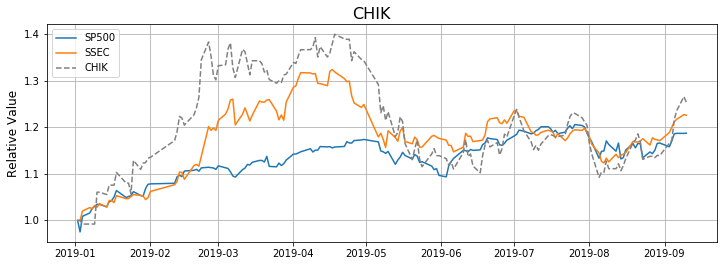

In [253]:
ticker = 'CHIK'
rtd = drawUsCnStockRelativePerformance(AdjClose, ticker, '2019-01-01')

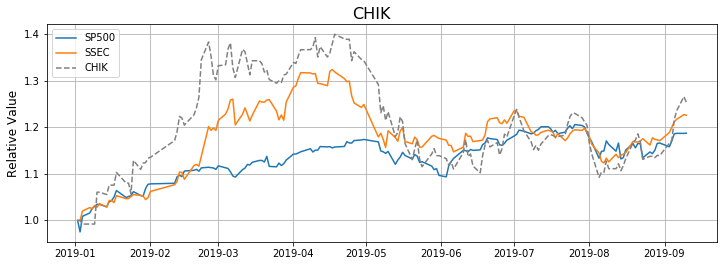

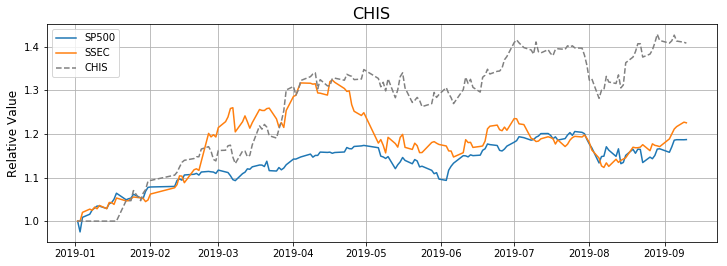

In [256]:
for x in [col for col in AdjClose.columns if col in ['CHIS','CHIK']]:
    drawUsCnStockRelativePerformance(AdjClose, x, '2019-01-01')

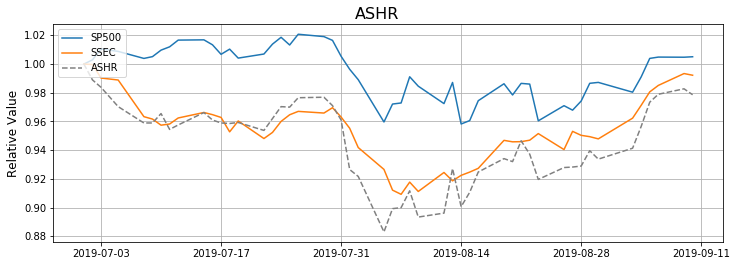

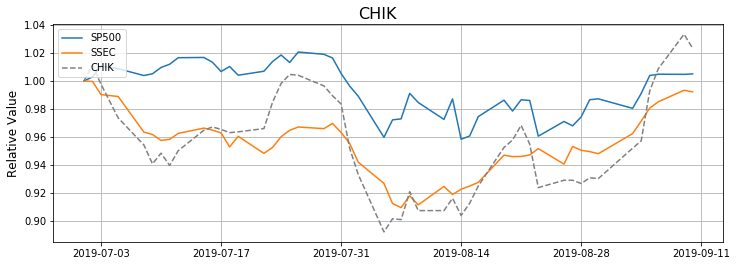

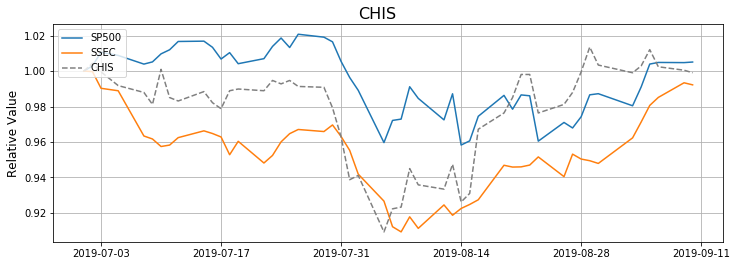

In [255]:
for x in [col for col in AdjClose.columns if col in ['ASHR','CHIS','CHIK']]:
    drawUsCnStockRelativePerformance(AdjClose, x, '2019-07-01')

In [342]:
%store -r badSymbolList
badSymbolList

['HHHHW',
 'HHHHU',
 'HHHHR',
 'VKTXW',
 'VERBW',
 'VTIQU',
 'USWSW',
 'BROGW',
 'BROGR',
 'THCAW',
 'THCBW',
 'TMCXW',
 'TMCXU',
 'TDACW',
 'TOTAW',
 'TOTAR',
 'TKKSW',
 'TKKSR',
 'TIBRW',
 'THBRU',
 'TZACW',
 'TCFCP',
 'THWWW',
 'SMMCW',
 'SNOAW',
 'SNGXW',
 'SSPKU',
 'ABEOW',
 'JFKKW',
 'JFKKR',
 'SFB',
 'BAC^Y',
 'AFGB']

In [294]:
badSymbolDf = pd.DataFrame(badSymbolList, columns = ['BadSymbol'])
os.chdir(r'E:\SR\StockLists')
badSymbolDf.to_csv('BadSymbol.csv', index=False, mode='a', header=False)

In [295]:
len(badSymbolDf)

2

# Use AlphaVantage for realtime analysis

In [302]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from stockstats import StockDataFrame as Sdf
import time
import pandas as pd
from datetime import datetime

ts = TimeSeries(key='YDTG632CVJ4469F6', output_format='pandas')

def getDaily(Name, size):
    daily, meta_data = ts.get_daily_adjusted(symbol=Name,outputsize=size)
    
    daily = daily[daily['1. open'].notnull()]

    daily['open'] = daily['1. open'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['high'] = daily['2. high'] *  daily['5. adjusted close'] /daily['4. close']
    daily['low'] = daily['3. low'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['close'] = daily['5. adjusted close']

    
    
    daily['volume'] = daily['6. volume']

    daily = Sdf.retype(daily)
    daily['kdjd']=daily['kdjd']
    daily['kdjd_5']=daily['kdjd_5']
    daily['boll'] =daily['boll']
    daily['close_55_sma'] = daily['close_55_sma']
    daily = daily[daily['open'] > 0]
    
    daily = daily[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                   'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return daily
def minutes(Name, interval, size):
    data, meta_data = ts.get_intraday(symbol=Name,interval=interval, outputsize=size)

    columDict = {'1. open':'open', '5. volume':'volume', '2. high':'high', '4. close':'close', '3. low':'low'}
    data = data.rename(columns=columDict)
    data = data[['open', 'high', 'low', 'close','volume']]

    ssdf = Sdf.retype(data)
    data['kdjd']=ssdf['kdjd']
    data['kdjd_5']=ssdf['kdjd_5'] 
    data['boll'] =ssdf['boll']
    data['close_55_sma'] = ssdf['close_55_sma']
    data = data[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                 'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return data

def plot(data):
    plt.figure(figsize=(10,3),facecolor='white')
    ax1 = data['kdjj'].plot(alpha=1, color='c', rot=15)
    ax1 = data['kdjk'].plot(alpha=1, color='r', rot=15)
    ax2 = data['close'].plot(secondary_y=True,color='black')
    ax2 = data['close_20_sma'].plot(secondary_y=True,color='y',alpha=0.3)
    ax2 = data['close_55_sma'].plot(secondary_y=True,color='c',alpha=0.3)
    ax2 = data['boll_ub'].plot(secondary_y=True,color='black', alpha=0.3)
    ax2 = data['boll_lb'].plot(secondary_y=True,color='black', alpha=0.3)
    
    #ax2 = data['kdjd'].plot(secondary_y=True, alpha=1, color='g', rot=15)
    #ax2.set_ylim(1, 100)
    #ax1.xticks(rotation=45)
    plt.show()

    
def plot1(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(10, 3))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'y', alpha=0.5)
    ax2.plot(daily.date, ma50, 'b', alpha=0.5)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax2.set_ylim(0, 100)
    plt.show()

def plot2(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(10, 3))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'y', alpha=0.5)
    ax2.plot(daily.date, ma50, 'b', alpha=0.5)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax2.set_yscale('log')
    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax1.set_yscale('log')
    #ax2.set_ylim(0, 100)
    plt.show()
    
    
def stockVolatility(name):
    df1 = getDaily(name,'compact')
    df2 = df1[df1['open'] > 0]
    #df2['closePct'] = 100*(df2['open'] - df2['close']) / df2['open']
    #df2['rangePct'] = 100* (df2['high'] - df2['low']) / df2['open']
    df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
    df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
    dT = df2[['highPct','lowPct']].describe()
    l = (100+ dT['lowpct']['75%'])*df2['close'][-1] / 100
    h = (100 + dT['highpct']['25%'])*df2['close'][-1] / 100 
    
    print("{0}, newest daily date: {1}".format(name, df2.index[-1]))
    print(" Daily variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
    print(" 75% Theoretical gain: {0:.2f} %".format(dT['highpct']['25%'] - dT['lowpct']['75%']))    
    print("\n")
       
    
    
def getStockTrend(Name):
    start = time.time()
    print(Name)
    print(datetime.now().strftime("%Y-%m-%d %H:%M"))
    print("\n")
    
    try:
        stockVolatility(Name)
    except:
        print("can't get stats")

    try:
        daily = getDaily(Name, 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('Daily')
        plot1(daily)
        
    except:
        print("can't get daily data")
        daily=pd.DataFrame()
        pass


    try:
        start = time.time()
        OneMin = minutes(Name, '1min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('One Minute')
        
        df2 = OneMin
        df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
        df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['close'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['close'][-1] / 100 
    
        print("{0}, newest one minute date time: {1}".format(Name, df2.index[-1]))
        print(" 1 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 1 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n") 
        
        
        plot(OneMin)
    except:
        print("can't get one minute data")
        pass


    try:
        start = time.time()
        FiveMin = minutes(Name, '5min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FiveMin')
        
        df2 = FiveMin
        df2['highPct'] = 100* (df2['high'] - df2['open']) / df2['open']
        df2['lowPct'] = 100* (df2['low'] - df2['open']) / df2['open']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['open'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['open'][-1] / 100 
    
        print("{0}, newest five minute date time: {1}".format(Name, df2.index[-1]))
        print(" 5 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 5 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n")         
               
        plot(FiveMin)
    except:
        print("can't get five minute data")
        pass

    try:
        start = time.time()
        FifteenMin = minutes(Name, '15min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FifteenMin')
        plot(FifteenMin)
    except:
        print("can't get fifteen minute data")
        pass


In [303]:
stockVolatility('GDX')

GDX, newest daily date: 2019-09-20
 Daily variation: 75% between 28.54 and 28.74
 75% Theoretical gain: 0.69 %




TCEHY
2019-09-20 16:16


TCEHY, newest daily date: 2019-09-20
 Daily variation: 75% between 42.63 and 42.95
 75% Theoretical gain: 0.73 %


time used 1 seconds.
Daily


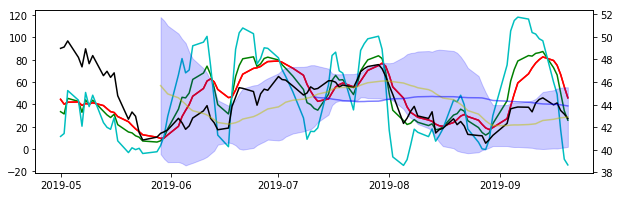

time used 0 seconds.
One Minute
TCEHY, newest one minute date time: 2019-09-20 16:00:00
 1 minutes variation: 75% between 42.77 and 42.77
 1 min 75% Theoretical gain: 0.00 %




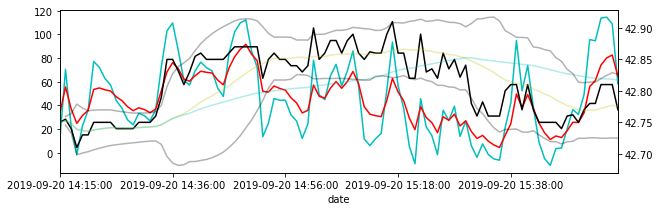

time used 1 seconds.
FiveMin
TCEHY, newest five minute date time: 2019-09-20 16:00:00
 5 minutes variation: 75% between 42.80 and 42.81
 5 min 75% Theoretical gain: 0.02 %




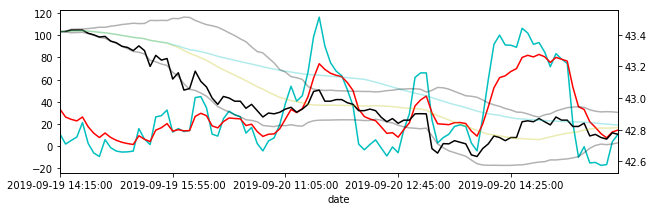

time used 1 seconds.
FifteenMin


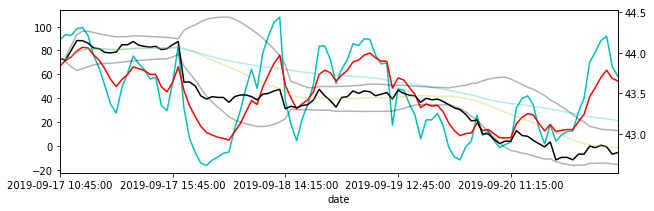

In [343]:
getStockTrend('TCEHY')

## 2019年9月19日，569个米股短期谷底高峰区间预测

In [326]:
os.chdir(r'E:\SR\StockLists')
PeakAndBottom = pd.read_csv('PeakAndBottom_20190920.txt', sep=',', header=None)
PeakAndBottom.columns = ['Rank', 'Date','Symbol','Bottom', 'Close', 'Peak']
PeakAndBottom['Peak'] = PeakAndBottom['Peak'].str.replace('6park.com','').str.strip().astype('float')
PeakAndBottom['Symbol'] = PeakAndBottom['Symbol'].str.strip()

PeakAndBottom.head()

,Rank,Date,Symbol,Bottom,Close,Peak
0,#001,190919,AAL,26.1492,28.30,29.2905
1,#002,190919,AAPL,208.9395,221.10,226.6275
2,#003,190919,AAT,46.0994,47.33,47.8033
3,#004,190919,ABC,81.1602,84.63,86.5765
4,#005,190919,ACGL,40.0704,41.14,41.7160


In [337]:
ticker = 'AAL'
PeakAndBottom[PeakAndBottom['Symbol'] == ticker]

,Rank,Date,Symbol,Bottom,Close,Peak
0,#001,190919,AAL,26.1492,28.3,29.2905
